In [43]:
from sklearn import svm
# XOR의 계산 결과 데이터 2차원 리스트 --- (※1) : 둘이 달라야 참, 같으면 거짓
xor_data = [
    #P, Q, result
    [0, 0, 0],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 0]
]

In [44]:
xor_data

[[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0]]

In [45]:
# 학습을 위해 데이터와 레이블 분리하기 --- (※2)
data = []
label = []

In [46]:
for row in xor_data:
    p = row[0] #첫 행의 첫째 값
    q = row[1]
    r = row[2]
    data.append([p,q])
    label.append(r)

In [47]:
data

[[0, 0], [0, 1], [1, 0], [1, 1]]

In [48]:
label

[0, 1, 1, 0]

In [49]:
# 데이터 학습시키기 --- (※3)
clf = svm.SVC() #SVM 알고리즘
clf.fit(data, label)
# 데이터 예측하기 --- (※4)
pre = clf.predict(data)
print(" 예측결과:", pre)

 예측결과: [0 1 1 0]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [50]:
# 결과 확인하기 --- (※5)
ok = 0
total = 0
ok
total

0

In [55]:
for idx, answer in enumerate(label):
    p = pre[idx] #pre = clf.predict(data)
    if p == answer: ok += 1
    total += 1
print("정답률:", ok, "/", total, "=", ok/total)

정답률: 4 / 4 = 1.0


# 프레임워크로 프로그램 간단하게 작성하기

In [56]:
import pandas as pd
from sklearn import svm, metrics
# XOR 연산
xor_input = [
    [0, 0, 0],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 0]
]

In [66]:
# 입력을 학습 전용 데이터와 테스트 전용 데이터로 분류하기 --- (※1)
xor_df = pd.DataFrame(xor_input)
xor_data  = xor_df.loc[:,0:1] # 데이터
xor_label = xor_df.loc[:,2]   # 레이블

In [67]:
xor_data

,0,1
0,0,0
1,0,1
2,1,0
3,1,1


In [68]:
xor_label

0    0
1    1
2    1
3    0
Name: 2, dtype: int64

In [70]:
# 데이터 학습과 예측하기 --- (※2)
clf = svm.SVC()
clf.fit(xor_data, xor_label)
pre = clf.predict(xor_data)
pre

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([0, 1, 1, 0], dtype=int64)

In [71]:
# 정답률 구하기 --- (※3)
ac_score = metrics.accuracy_score(xor_label, pre)
print("정답률 =", ac_score)

정답률 = 1.0


# 붓꽃의 품종 분류하기
100개는 학습, 50개는 테스트

In [78]:
from sklearn import svm, metrics
import random, re
# 붓꽃의 CSV 데이터 읽어 들이기 --- (※1)
csv = []
with open('C:/Users/HaebinLee/Desktop/exercise/iris.csv', 'r', encoding='utf-8') as fp:
    # 한 줄씩 읽어 들이기
    for line in fp:
        line = line.strip() # 줄바꿈 제거
        cols = line.split(',') # 쉼표로 자르기
        # 문자열 데이터를 숫자로 변환하기 : 정규표현식을 사용해 해당 셀의 내용이 숫자인지 확인하고, 숫자면 float()을 사용해 실수로 변환
        fn = lambda n : float(n) if re.match(r'^[0-9\.]+$', n) else n #lambda로 익명 함수를 정의하고, (삼항 연산자)
        cols = list(map(fn, cols)) #리스트에 처리를 적용하는 map() 함수를 사용해 리스트 내부의 모든 값을 변환.
        csv.append(cols)
# 가장 앞 줄의 헤더 제거
del csv[0]

# 삼항연산자?
값 = (True일 때의 값) if (조건) else (False일 때의 값)

In [79]:
line

'5.9,3.0,5.1,1.8,Iris-virginica'

In [80]:
cols

[5.9, 3.0, 5.1, 1.8, 'Iris-virginica']

In [81]:
# 데이터 셔플하기(섞기) --- (※2) : 최종 score가 쪼금 달라질 수 있음
random.shuffle(csv)

# 학습 전용 데이터와 테스트 전용 데이터 분할하기(2:1 비율) --- (※3)
total_len = len(csv)
train_len = int(total_len * 2 / 3)

train_data = []
train_label = []

test_data = []
test_label = []

In [82]:
total_len

150

In [83]:
train_len

100

In [84]:
for i in range(total_len):
    data  = csv[i][0:4] #4전까지!
    label = csv[i][4]
    if i < train_len:
        train_data.append(data)
        train_label.append(label)
    else:
        test_data.append(data)
        test_label.append(label)

In [85]:
# 데이터를 학습시키고 예측하기 --- (※4)
clf = svm.SVC()
clf.fit(train_data, train_label)
pre = clf.predict(test_data)
# 정답률 구하기 --- (※5)
ac_score = metrics.accuracy_score(test_label, pre)
print("정답률 =", ac_score)

정답률 = 0.98


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# 훈련 전용 데이터와 테스트 전용 데이터로 분할하는 메서드

In [86]:
import pandas as pd
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
# 붓꽃의 CSV 데이터 읽어 들이기 --- (※1)
csv = pd.read_csv('C:/Users/HaebinLee/Desktop/exercise/iris.csv')

In [87]:
csv

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [88]:
# 필요한 열 열이름으로 추출하기 --- (※2)
csv_data = csv[["SepalLength","SepalWidth","PetalLength","PetalWidth"]]
csv_label = csv["Name"]

In [90]:
csv_data

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [91]:
# 학습 전용 데이터와 테스트 전용 데이터로 나누기 --- (※3)
train_data, test_data, train_label, test_label = \
train_test_split(csv_data, csv_label)

In [93]:
test_label

124     Iris-virginica
7          Iris-setosa
60     Iris-versicolor
77     Iris-versicolor
133     Iris-virginica
146     Iris-virginica
105     Iris-virginica
49         Iris-setosa
29         Iris-setosa
145     Iris-virginica
99     Iris-versicolor
117     Iris-virginica
112     Iris-virginica
54     Iris-versicolor
61     Iris-versicolor
35         Iris-setosa
129     Iris-virginica
79     Iris-versicolor
41         Iris-setosa
9          Iris-setosa
141     Iris-virginica
23         Iris-setosa
3          Iris-setosa
58     Iris-versicolor
101     Iris-virginica
14         Iris-setosa
70     Iris-versicolor
62     Iris-versicolor
69     Iris-versicolor
57     Iris-versicolor
52     Iris-versicolor
17         Iris-setosa
84     Iris-versicolor
128     Iris-virginica
87     Iris-versicolor
64     Iris-versicolor
59     Iris-versicolor
19         Iris-setosa
Name: Name, dtype: object

In [94]:
# 데이터 학습시키고 예측하기 --- (※4)
clf = svm.SVC()
clf.fit(train_data, train_label)
pre = clf.predict(test_data)
# 정답률 구하기 --- (※5)
ac_score = metrics.accuracy_score(test_label, pre)
print("정답률 =", ac_score)

정답률 = 0.9736842105263158


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# SVM

In [95]:
import random
# BMI를 계산해서 레이블을 리턴하는 함수
def calc_bmi(h, w):
    bmi = w / (h/100) ** 2
    if bmi < 18.5: return "thin"
    if bmi < 25: return "normal"
    return "fat"

In [112]:
calc_bmi(163,49.1)

'thin'

In [113]:
# 출력 파일 준비하기
fp = open("C:/Users/HaebinLee/Desktop/exercise/bmi.csv","w",encoding="utf-8")
fp.write("height,weight,label\r\n")

21

In [114]:
# 무작위로 데이터 생성하기
cnt = {"thin":0, "normal":0, "fat":0}
cnt

{'thin': 0, 'normal': 0, 'fat': 0}

In [115]:
for i in range(20000): #무작위니까 매번 다르겠지?
    h = random.randint(120,200)
    w = random.randint(35, 80)
    label = calc_bmi(h, w)
    cnt[label] += 1
    fp.write("{0},{1},{2}\r\n".format(h, w, label))
fp.close()
print("ok,", cnt)

ok, {'thin': 6417, 'normal': 5926, 'fat': 7657}


# SVM test

In [116]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
# 키와 몸무게 데이터 읽어 들이기 --- (※1)
tbl = pd.read_csv("bmi.csv")

In [117]:
# 칼럼(열)을 자르고 정규화하기 --- (※2) : 헤더 이름 기반으로 필요한 컬럼 추출
label = tbl["label"]
w = tbl["weight"] / 100 # 최대 100kg라고 가정
h = tbl["height"] / 200 # 최대 200cm라고 가정 => 범위를 0부터 1로, pandas : for문 없이 배열 전체의 요소 연산 가능
wh = pd.concat([w, h], axis=1)

In [118]:
label

0        normal
1        normal
2           fat
3           fat
4          thin
5          thin
6           fat
7           fat
8           fat
9        normal
10         thin
11          fat
12       normal
13         thin
14         thin
15         thin
16          fat
17         thin
18          fat
19       normal
20         thin
21          fat
22          fat
23          fat
24          fat
25          fat
26          fat
27          fat
28         thin
29         thin
          ...  
19970       fat
19971       fat
19972    normal
19973       fat
19974       fat
19975       fat
19976    normal
19977       fat
19978    normal
19979    normal
19980       fat
19981       fat
19982      thin
19983      thin
19984       fat
19985      thin
19986    normal
19987       fat
19988       fat
19989       fat
19990       fat
19991      thin
19992      thin
19993       fat
19994    normal
19995      thin
19996    normal
19997    normal
19998    normal
19999    normal
Name: label, Length: 200

In [119]:
w

0        0.51
1        0.59
2        0.72
3        0.78
4        0.55
5        0.42
6        0.79
7        0.67
8        0.47
9        0.52
10       0.56
11       0.74
12       0.36
13       0.36
14       0.53
15       0.43
16       0.78
17       0.63
18       0.65
19       0.74
20       0.64
21       0.48
22       0.51
23       0.70
24       0.78
25       0.60
26       0.65
27       0.74
28       0.45
29       0.47
         ... 
19970    0.79
19971    0.63
19972    0.62
19973    0.62
19974    0.78
19975    0.60
19976    0.37
19977    0.59
19978    0.77
19979    0.77
19980    0.75
19981    0.39
19982    0.40
19983    0.70
19984    0.78
19985    0.37
19986    0.38
19987    0.69
19988    0.52
19989    0.72
19990    0.70
19991    0.44
19992    0.44
19993    0.77
19994    0.57
19995    0.40
19996    0.71
19997    0.49
19998    0.80
19999    0.63
Name: weight, Length: 20000, dtype: float64

In [120]:
wh

,weight,height
0,0.51,0.825
1,0.59,0.850
2,0.72,0.625
3,0.78,0.650
4,0.55,1.000
5,0.42,0.800
6,0.79,0.635
7,0.67,0.795
8,0.47,0.660
9,0.52,0.775


In [121]:
# 학습 전용 데이터와 테스트 전용 데이터로 나누기 --- (※3)
data_train, data_test, label_train, label_test = \
    train_test_split(wh, label)
# 데이터 학습하기 --- (※4)
clf = svm.SVC()
clf.fit(data_train, label_train)
# 데이터 예측하기 --- (※5)
predict = clf.predict(data_test)
# 결과 테스트하기 --- (※6)
ac_score = metrics.accuracy_score(label_test, predict)
cl_report = metrics.classification_report(label_test, predict)
print("정답률 =", ac_score)
print("리포트 =\n", cl_report)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


정답률 = 0.984
리포트 =
               precision    recall  f1-score   support

         fat       1.00      0.99      0.99      1938
      normal       0.96      0.98      0.97      1463
        thin       0.99      0.98      0.98      1599

   micro avg       0.98      0.98      0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000



# 시각화

In [124]:
import matplotlib.pyplot as plt
import pandas as pd
# Pandas로 CSV 파일 읽어 들이기
tbl = pd.read_csv("bmi.csv", index_col=2)
# 그래프 그리기 시작
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [125]:
fig

<Figure size 432x288 with 0 Axes>

In [126]:
ax = fig.add_subplot(1, 1, 1)

In [127]:
ax

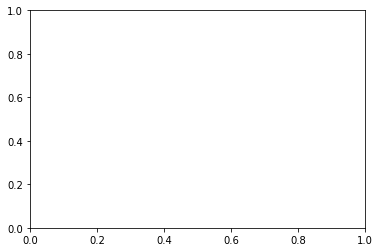

In [128]:
fig

In [129]:
# 서브 플롯 전용 - 지정한 레이블을 임의의 색으로 칠하기
def scatter(lbl, color):
    b = tbl.loc[lbl]
    ax.scatter(b["weight"],b["height"], c=color, label=lbl)

In [130]:
scatter("fat",    "red")

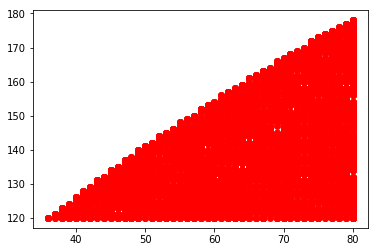

In [131]:
fig

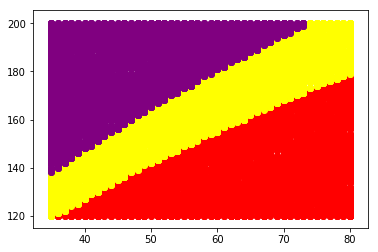

In [132]:
scatter("normal", "yellow")
scatter("thin",   "purple")
fig

In [133]:
ax.legend() 

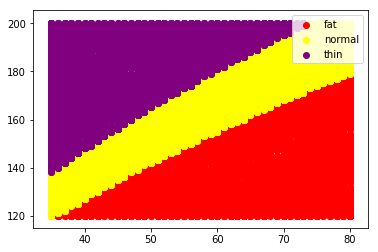

In [134]:
fig

In [135]:
plt.savefig("bmi-test.png")
# plt.show()

<Figure size 432x288 with 0 Axes>

# 랜덤 포레스트

In [139]:
import urllib.request as req
local= "mushroom.csv"
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
req.urlretrieve(url, local)
print("ok")
#다운안됨

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1051)>

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
# 데이터 읽어 들이기--- (※1)
mr = pd.read_csv("mushroom.csv", header=None) #맨 왼쪽이 독 유무 : p가 독, e는 식용
# 데이터 내부의 기호를 숫자로 변환하기--- (※2)
label = []
data = []
attr_list = []
for row_index, row in mr.iterrows():
    label.append(row.ix[0])
    row_data = []
    for v in row.ix[1:]:
        row_data.append(ord(v))
    data.append(row_data)
# 학습 전용과 테스트 전용 데이터로 나누기 --- (※3)
data_train, data_test, label_train, label_test = \
    train_test_split(data, label)
# 데이터 학습시키기 --- (※4)
clf = RandomForestClassifier()
clf.fit(data_train, label_train)
# 데이터 예측하기 --- (※5)
predict = clf.predict(data_test)
# 결과 테스트하기 --- (※6)
ac_score = metrics.accuracy_score(label_test, predict)
cl_report = metrics.classification_report(label_test, predict)
print("정답률 =", ac_score)
print("리포트 =\n", cl_report)